<a href="https://colab.research.google.com/github/Qbaxxx/Metody_analizy_danych_LAB_JBabinski/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/kropiak/swps-metody-analizy-danych/refs/heads/main/lab_06/data/zamowienia.csv", sep=';')

In [3]:
print(df.head())

     Kraj Sprzedawca Data zamowienia  idZamowienia    Utarg
0  Polska   Kowalski      2003-07-16         10248   440.00
1  Polska   Sowiński      2003-07-10         10249  1863.40
2  Niemcy    Peacock      2003-07-12         10250  1552.60
3  Niemcy  Leverling      2003-07-15         10251   654.06
4  Niemcy    Peacock      2003-07-11         10252  3597.90


Zadanie 1

In [4]:
import pandas as pd

# 1.1
print("Brakujące wartości przed manipulacją:")
print(df.isnull().sum())

# 1.2
sprzedawca_idx = df.sample(frac=0.1, random_state=42).index
df.loc[sprzedawca_idx, 'Sprzedawca'] = 'BRAK'

# 1.3
idzamowienia_idx = df.sample(frac=0.05, random_state=43).index
df.loc[idzamowienia_idx, 'idZamowienia'] = np.nan

# 1.4
datazamowienia_idx = df.sample(frac=0.2, random_state=44).index
df.loc[datazamowienia_idx, 'Data zamówienia'] = np.nan

# 1.5
utarg_idx = df.sample(frac=0.15, random_state=45).index
df.loc[utarg_idx, 'Utarg'] = np.nan

# 1.6
df_missing = df[df.isnull().any(axis=1)]

# Podgląd końcowy
print("\nBrakujące wartości po manipulacjach:")
print(df.isnull().sum())

Brakujące wartości przed manipulacją:
Kraj               0
Sprzedawca         0
Data zamowienia    0
idZamowienia       0
Utarg              0
dtype: int64

Brakujące wartości po manipulacjach:
Kraj                 0
Sprzedawca           0
Data zamowienia      0
idZamowienia        40
Utarg              120
Data zamówienia    799
dtype: int64


Zadanie 2

In [5]:
# Zadanie 2

# 2.1
df_missing['idZamowienia'] = df_missing['idZamowienia'].fillna(0)

# 2.2
df_missing['Data zamówienia'] = df_missing['Data zamówienia'].ffill()


# 2.3
df_missing['Utarg'] = df_missing.groupby('Kraj')['Utarg'].transform(
    lambda x: x.fillna(x.mean())
)

Zadanie 3

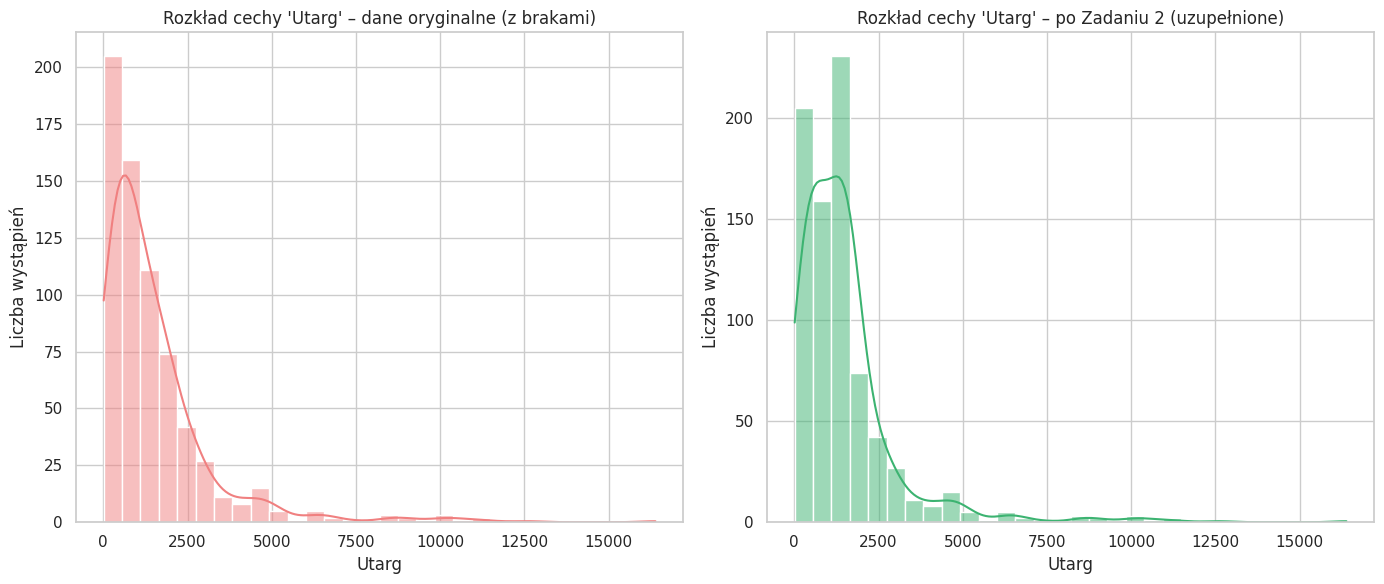

In [6]:
# Ustawienia stylu wykresów
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# 1. Histogram danych oryginalnych
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Utarg", kde=True, bins=30, color="lightcoral")
plt.title("Rozkład cechy 'Utarg' – dane oryginalne (z brakami)")
plt.xlabel("Utarg")
plt.ylabel("Liczba wystąpień")

# 2. Histogram danych po uzupełnieniu (df_missing)
plt.subplot(1, 2, 2)
sns.histplot(data=df_missing, x="Utarg", kde=True, bins=30, color="mediumseagreen")
plt.title("Rozkład cechy 'Utarg' – po Zadaniu 2 (uzupełnione)")
plt.xlabel("Utarg")
plt.ylabel("Liczba wystąpień")

plt.tight_layout()
plt.show()

Zadanie 4

In [7]:
# Konwersja kolumny daty do formatu datetime
df['Data zamowienia'] = pd.to_datetime(df['Data zamowienia'], errors='coerce')

# 4.1
srednia_kraj = df.groupby('Kraj')['Utarg'].mean()
print("4.1 Średnia wartość zamówienia dla każdego kraju:\n", srednia_kraj, "\n")

# 4.2
df['Rok'] = df['Data zamowienia'].dt.year
df['Miesiąc'] = df['Data zamowienia'].dt.month

srednia_rok_miesiac = df.groupby(['Rok', 'Miesiąc'])['Utarg'].mean()
print("4.2 Średnia wartość zamówienia na rok i miesiąc:\n", srednia_rok_miesiac, "\n")

# 4.3
liczba_zamowien = df.groupby(['Sprzedawca', 'Rok']).size()
print("4.3 Liczba zamówień dla każdego sprzedawcy w danym roku:\n", liczba_zamowien, "\n")

# 4.4
najlepszy_sprzedawca = df.groupby(['Kraj', 'Sprzedawca'])['Utarg'].sum().reset_index()
najlepszy_sprzedawca = najlepszy_sprzedawca.sort_values(['Kraj', 'Utarg'], ascending=[True, False])
najlepsi = najlepszy_sprzedawca.groupby('Kraj').first()
print("4.4 Najlepszy sprzedawca w każdym kraju (najwyższy utarg):\n", najlepsi, "\n")

# 4.5
df['Kwartal'] = df['Data zamowienia'].dt.quarter
suma_kwartal = df.groupby(['Rok', 'Kwartal'])['Utarg'].sum().sort_values(ascending=False)
print("4.5 Suma utargu w każdym kwartale (posortowane):\n", suma_kwartal)

4.1 Średnia wartość zamówienia dla każdego kraju:
 Kraj
Niemcy    1508.440000
Polska    1509.126885
Name: Utarg, dtype: float64 

4.2 Średnia wartość zamówienia na rok i miesiąc:
 Rok   Miesiąc
2003  7          1188.590000
      8           915.259444
      9           925.885263
      10         1356.704783
      11         2240.330000
      12         1218.161379
2004  1          1634.311111
      2          1248.950870
      3          1632.239643
      4          1119.343846
      5          2122.574643
      6          1645.906154
      7          1205.617727
      8          1637.984545
      9          1189.302581
      10         2064.032778
      11          923.671034
      12         1703.327000
2005  1          1505.047000
      2          1990.895556
      3          1208.941667
      4          1710.142353
      5          1305.294000
Name: Utarg, dtype: float64 

4.3 Liczba zamówień dla każdego sprzedawcy w danym roku:
 Sprzedawca  Rok 
BRAK        2003    14
           